# Credit Card Default Detection

### Data Information 

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

### Content 

There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 
8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

1.Consider the Credit Card Default Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
colour=sns.color_palette()

In [2]:
data=pd.read_csv('D:\\Datascience\\datas\\UCI_credit_card.csv')

In [3]:
print(data.shape)
data.head()

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


2.Perform Data Cleaning, if any needed.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [5]:
cat_cols=[]
for col in data.select_dtypes('int64'):
    if col!='AGE':
        if col!='ID':
            cat_cols.append(col)
    

In [6]:
print(cat_cols)

['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default.payment.next.month']


In [7]:
for col in cat_cols:
    data[col]=data[col].astype('category')

In [8]:
data.dtypes

ID                               int64
LIMIT_BAL                      float64
SEX                           category
EDUCATION                     category
MARRIAGE                      category
AGE                              int64
PAY_0                         category
PAY_2                         category
PAY_3                         category
PAY_4                         category
PAY_5                         category
PAY_6                         category
BILL_AMT1                      float64
BILL_AMT2                      float64
BILL_AMT3                      float64
BILL_AMT4                      float64
BILL_AMT5                      float64
BILL_AMT6                      float64
PAY_AMT1                       float64
PAY_AMT2                       float64
PAY_AMT3                       float64
PAY_AMT4                       float64
PAY_AMT5                       float64
PAY_AMT6                       float64
default.payment.next.month    category
dtype: object

3.Perform Uni-variate Analysis for categorical and continuous features

lets rename the taget column

In [9]:
data=data.rename(columns={'default.payment.next.month':'default_nxt'})

In [10]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_nxt'],
      dtype='object')

In [11]:
pd.set_option('display.max_columns',30)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_nxt
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [12]:
size=[data.default_nxt[data['default_nxt']==1].count(),data.default_nxt[data['default_nxt']==0].count()]
labels=['Defaulter','Not_A_Defaulter']

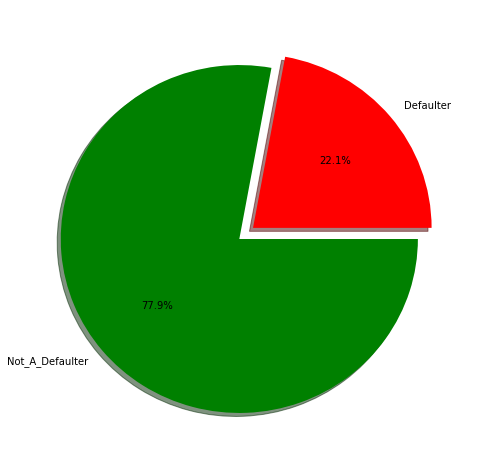

In [13]:
plt.figure(figsize=(8,8))
plt.pie(size, labels=labels, autopct='%1.1f%%', explode=(0,0.1), colors='rg',shadow=True)
plt.show()

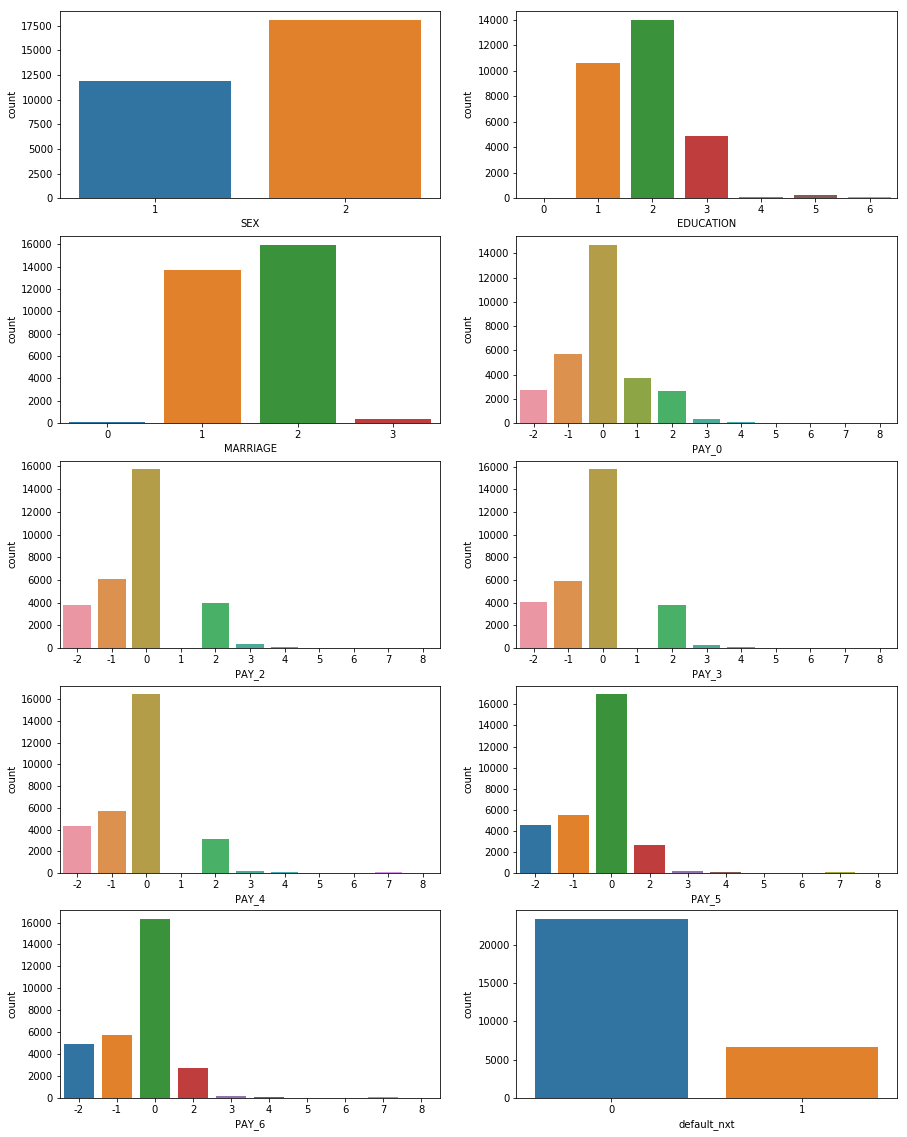

In [14]:
plt.figure(figsize=(15,20))
n=1
for col in data.select_dtypes('category'):
    plt.subplot(5,2,n)
    sns.countplot(x=col,data=data)
    n=n+1
plt.show()

C:\Users\Antony\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


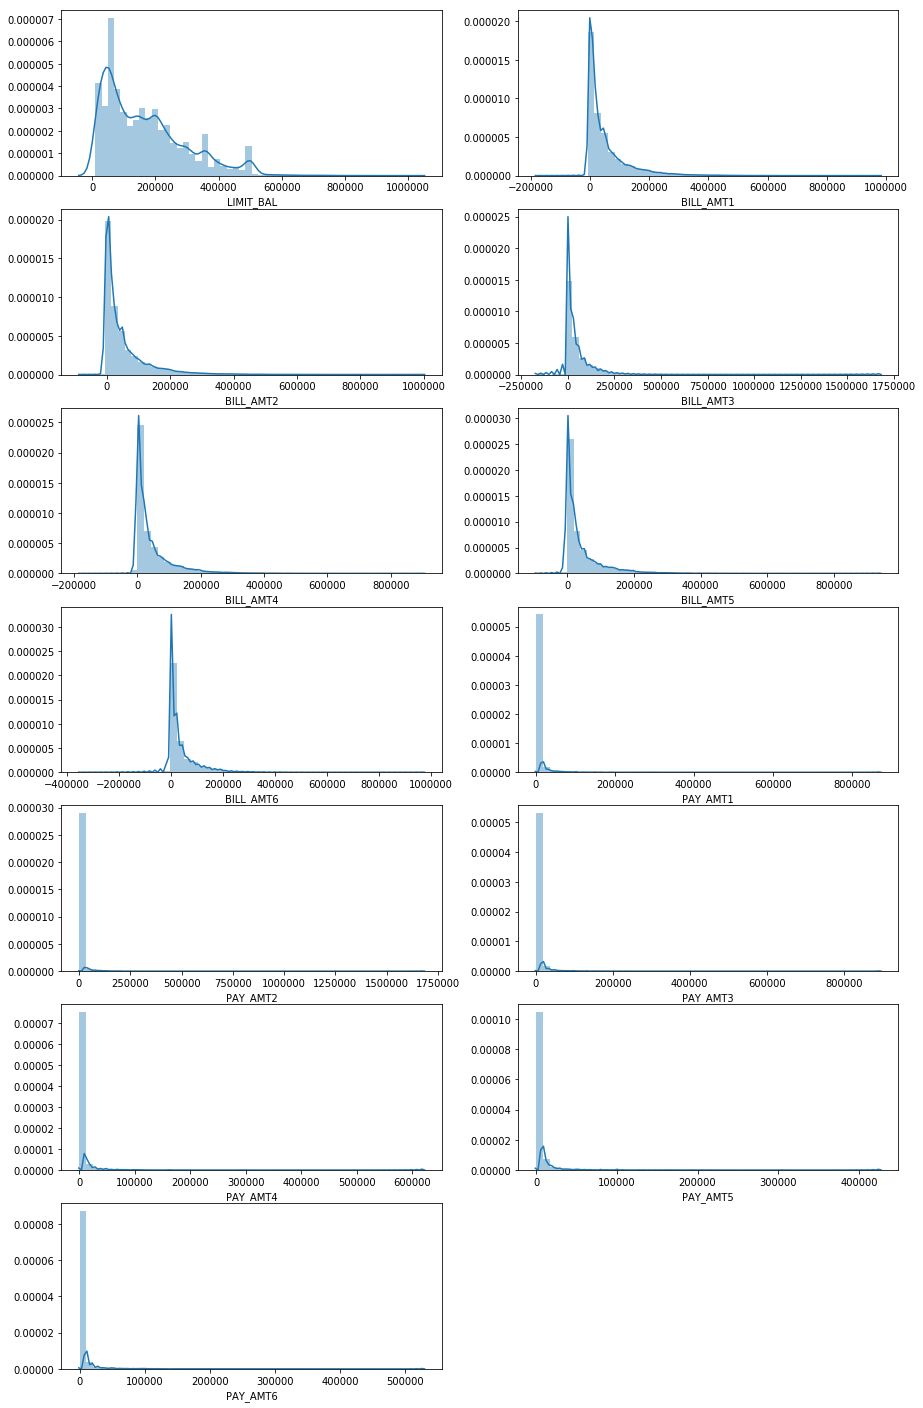

In [15]:
plt.figure(figsize=(15,25))
n=1
for col in data.select_dtypes('float64', 'int64'):
           plt.subplot(7,2,n)
           sns.distplot(data[col])
           n=n+1        
plt.show()

4.Perform Bi-variate Analysis for 2 categorical w.r.t target, categorical to categorical, categorical to continuous, continuous w.r.t target and continuous to continuous.

a. 2 cat-Var with target

In [16]:
sex_default=pd.crosstab(data.default_nxt,data.SEX)
sex_default                                         #payment defaulter with respect to sex

SEX,1,2
default_nxt,,
0,9015,14349
1,2873,3763


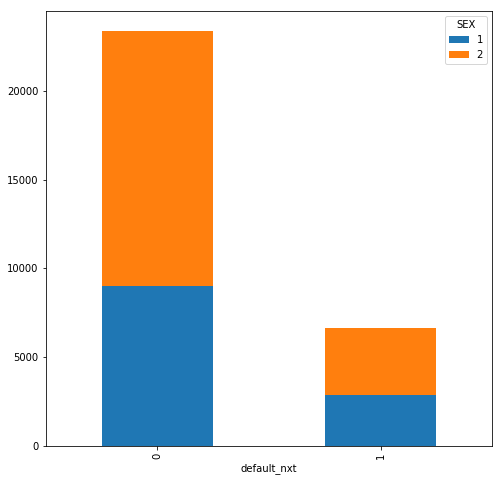

In [17]:
sex_default.plot(kind='bar',stacked=True, figsize=(8,8)) 
plt.show()

In [18]:
edu_default=pd.crosstab(data.default_nxt,data.EDUCATION)
edu_default

EDUCATION,0,1,2,3,4,5,6
default_nxt,,,,,,,
0,14,8549,10700,3680,116,262,43
1,0,2036,3330,1237,7,18,8


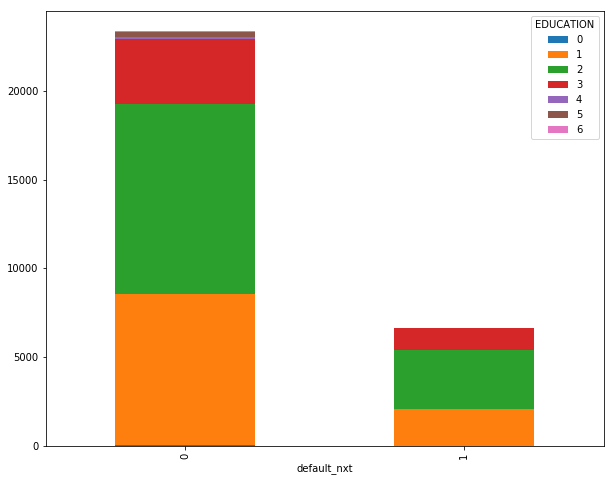

In [19]:
edu_default.plot(kind='bar', stacked=True, figsize=(10,8))
plt.show()   #1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown

b. Continus w.r.t target

C:\Users\Antony\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


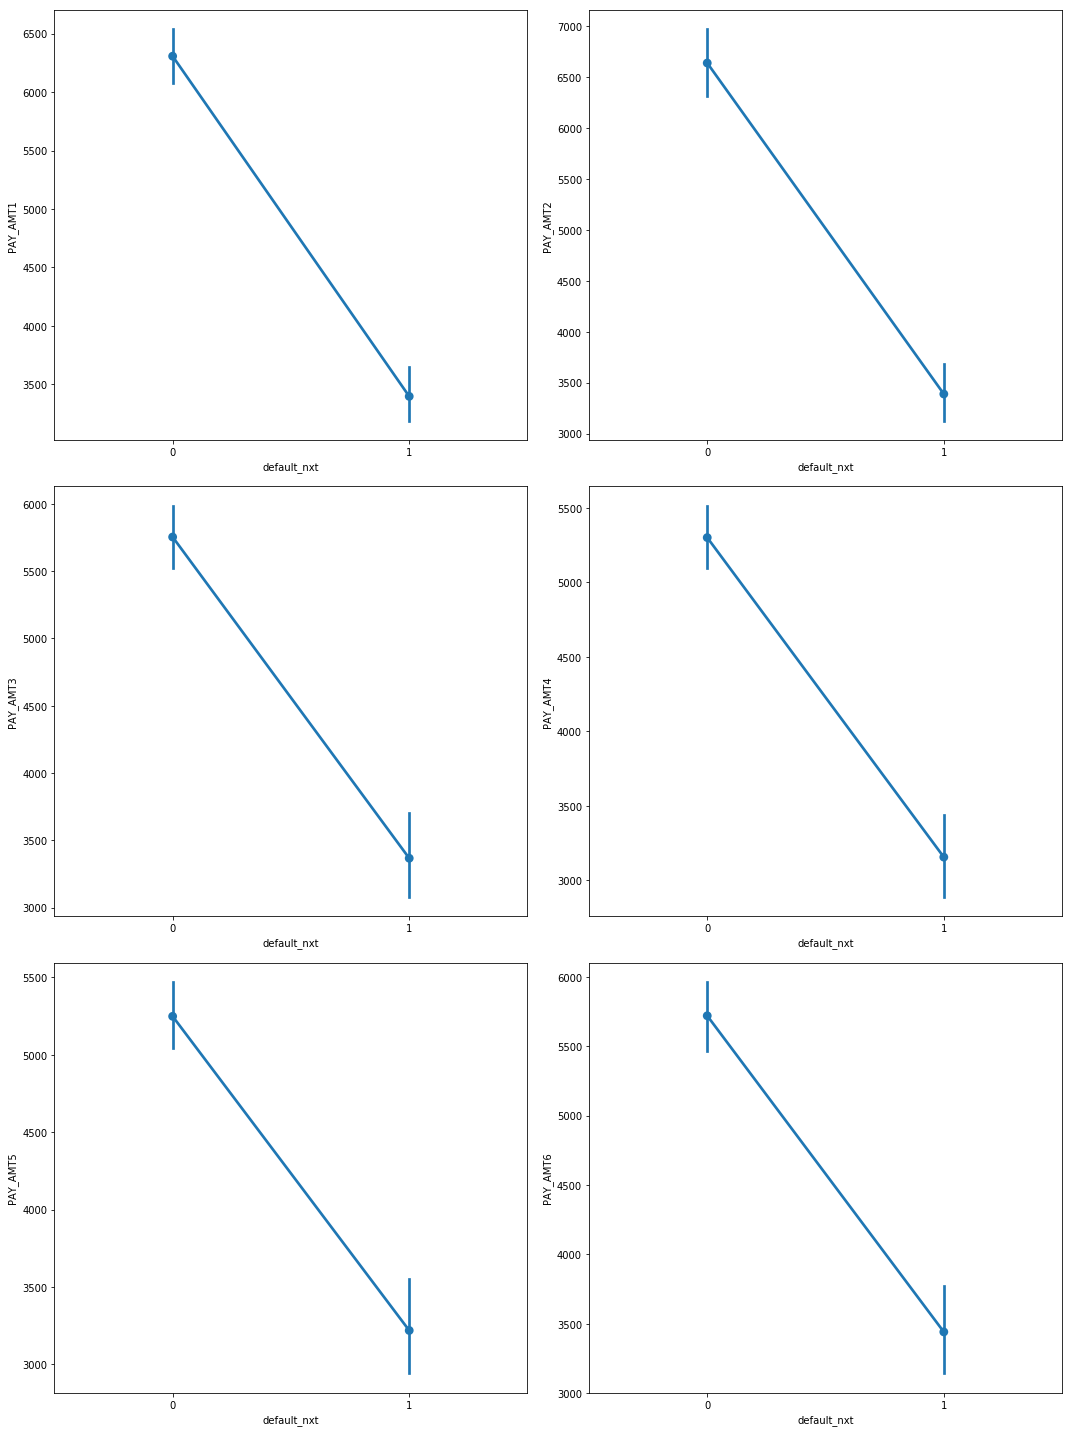

In [20]:
pay_cols=['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
plt.figure(figsize=(15,20))
n=1
for col in pay_cols:
    plt.subplot(3,2,n)
    sns.pointplot(x='default_nxt', y=col,data=data)
    n=n+1
    plt.tight_layout()
plt.show()

5.Normalize the features (categorical and continuous)

In [21]:
num_cols=[]
for col in data.select_dtypes(['int64','float64']):
    num_cols.append(col)

In [22]:
num_cols

['ID',
 'LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [23]:
from sklearn.preprocessing import MinMaxScaler 

In [24]:
nums=data.loc[:,num_cols]
numeric=MinMaxScaler().fit_transform(nums)
num_df=pd.DataFrame(numeric,columns=num_cols)

In [25]:
num_df.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.000000,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.000033,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.000067,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.000100,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.000133,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284


In [26]:
cat_cols=[]
for col in data.select_dtypes('category'):
    cat_cols.append(col)
cat_cols

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'default_nxt']

In [27]:
cat_df=data[cat_cols]
cat_df.head()

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default_nxt
0,2,2,1,2,2,-1,-1,-2,-2,1
1,2,2,2,-1,2,0,0,0,2,1
2,2,2,2,0,0,0,0,0,0,0
3,2,2,1,0,0,0,0,0,0,0
4,1,2,1,-1,0,-1,0,0,0,0


In [28]:
data=pd.concat([num_df,cat_df],axis=1)
data.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default_nxt
0,0.000000,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,2,2,1,2,2,-1,-1,-2,-2,1
1,0.000033,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,2,2,2,-1,2,0,0,0,2,1
2,0.000067,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,2,2,2,0,0,0,0,0,0,0
3,0.000100,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,2,2,1,0,0,0,0,0,0,0
4,0.000133,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,1,2,1,-1,0,-1,0,0,0,0


6.Use K-Fold cross validation for train and test split in data

In [29]:
x=data.drop('default_nxt', axis=1)

In [30]:
y=data['default_nxt']

In [31]:
from sklearn.cross_validation import train_test_split

C:\Users\Antony\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=1)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24000, 24)
(6000, 24)
(24000,)
(6000,)


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [35]:
DT=DecisionTreeClassifier()

In [36]:
scores=cross_val_score(DT,x_train,y_train, cv=10, scoring='accuracy')

In [37]:
scores

array([0.73261141, 0.73333333, 0.73458333, 0.72958333, 0.71791667,
       0.71791667, 0.72583333, 0.73958333, 0.73791667, 0.73030429])

In [38]:
scores.mean()

0.7299582372033978

In [39]:
scores.std()

0.007092779292516215

7.Plot confusion matrix, classification report

In [40]:
Model=DT.fit(x_train,y_train)
y_pred=Model.predict(x_test)
print(y_pred)

[0 1 0 ... 0 0 0]


In [46]:
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[3746,  917],
       [ 809,  528]], dtype=int64)

In [50]:
sns.heatmap(confusion_matrix, square=True, cmap='bwr')

ValueError: Must pass 2-d input

In [49]:
result=classification_report(y_test, y_pred, target_names=('Defaulter', 'not_defaulter'))
print(result)

               precision    recall  f1-score   support

    Defaulter       0.82      0.80      0.81      4663
not_defaulter       0.37      0.39      0.38      1337

  avg / total       0.72      0.71      0.72      6000



8. Accuracy Score

In [43]:
accuracy_score=((3743+546)/(3743+546+920+791))*100
accuracy_score

71.48333333333333

In [44]:
class_names=['Actual','Predicted']

In [45]:
plt.plot(confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization'))

TypeError: 'numpy.ndarray' object is not callable